<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2025_jun/blob/main/03machinelearning/clase_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clase 17

Grupo 1
Páginas 44 a 54

Grupo 2
Páginas 55 a 67

Grupo 3
Páginas 67 a 101

### Método del Codo (Elbow Method)


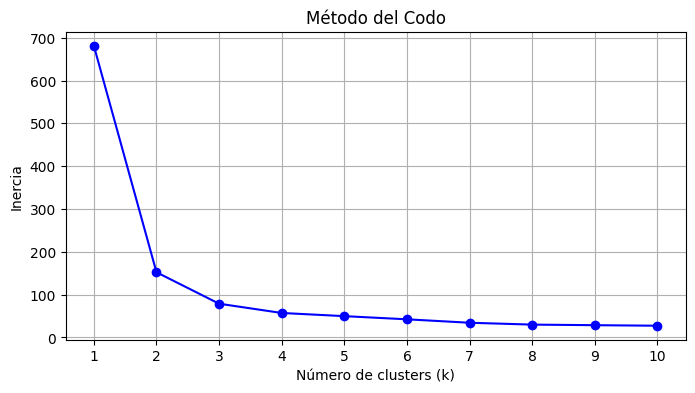

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Cargamos datos
iris = load_iris()
X = iris.data

# Método del codo
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Graficar
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.xticks(K)
plt.grid(True)
plt.show()


In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html

# metric
> str or callable, optional

The distance metric to use. If a string, the distance function can be ‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, ‘cosine’, ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘jensenshannon’, ‘kulczynski1’, ‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’.



## Coeficiente de Silueta

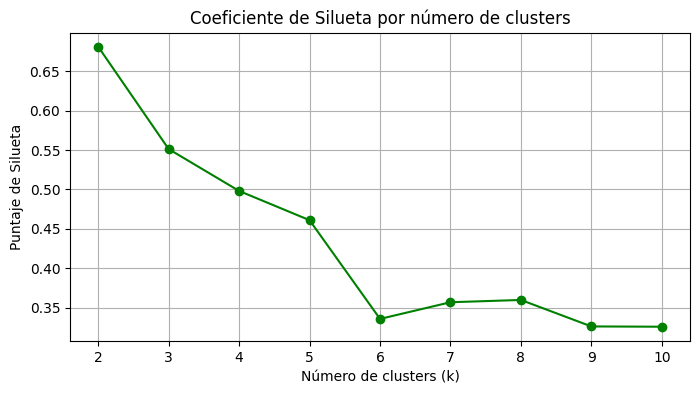

In [3]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    sil_score = silhouette_score(X, labels)
    silhouette_scores.append(sil_score)

# Graficar
plt.figure(figsize=(8, 4))
plt.plot(K, silhouette_scores, 'go-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Puntaje de Silueta')
plt.title('Coeficiente de Silueta por número de clusters')
plt.xticks(K)
plt.grid(True)
plt.show()


In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [4]:
%pip install estyp

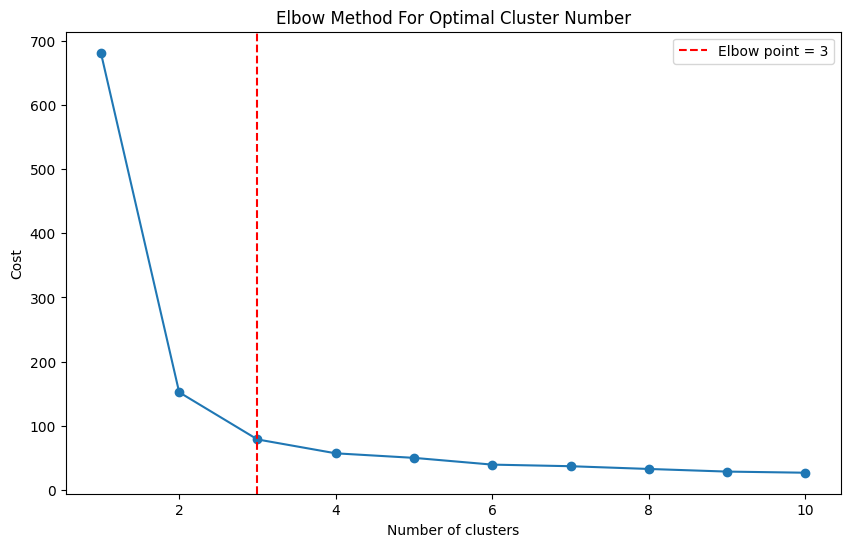

In [7]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from estyp.cluster import NClusterSearch

data = load_iris().data
new_data = load_iris().data[:10]
searcher = NClusterSearch(estimator=KMeans(), method='elbow')
searcher.fit(data)

labels = searcher.labels_
predicted_labels = searcher.predict(new_data)
optimal_model = searcher.best_estimator_
optimal_clusters = searcher.optimal_clusters_

searcher.plot()

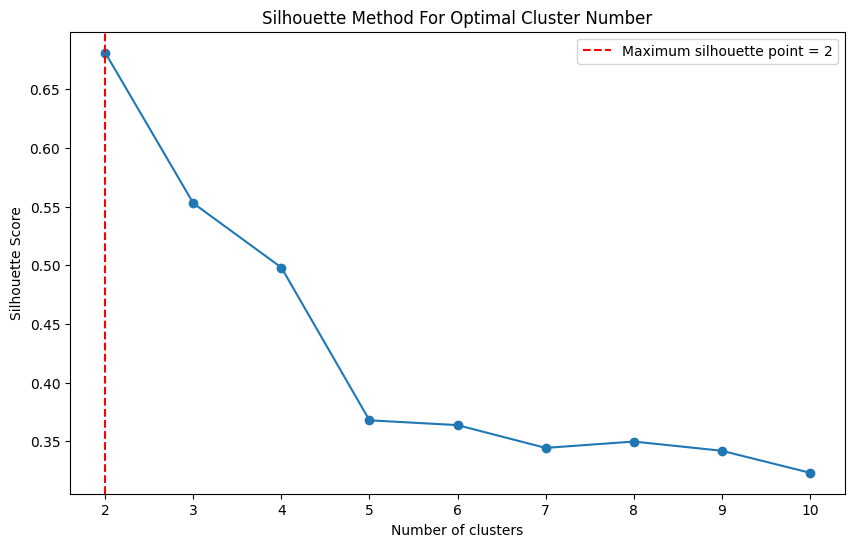

In [13]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from estyp.cluster import NClusterSearch

data = load_iris().data
new_data = load_iris().data[:10]
searcher = NClusterSearch(estimator=KMeans(), method='silhouette')
searcher.fit(data)

labels = searcher.labels_
predicted_labels = searcher.predict(new_data)
optimal_model = searcher.best_estimator_
optimal_clusters = searcher.optimal_clusters_

searcher.plot()

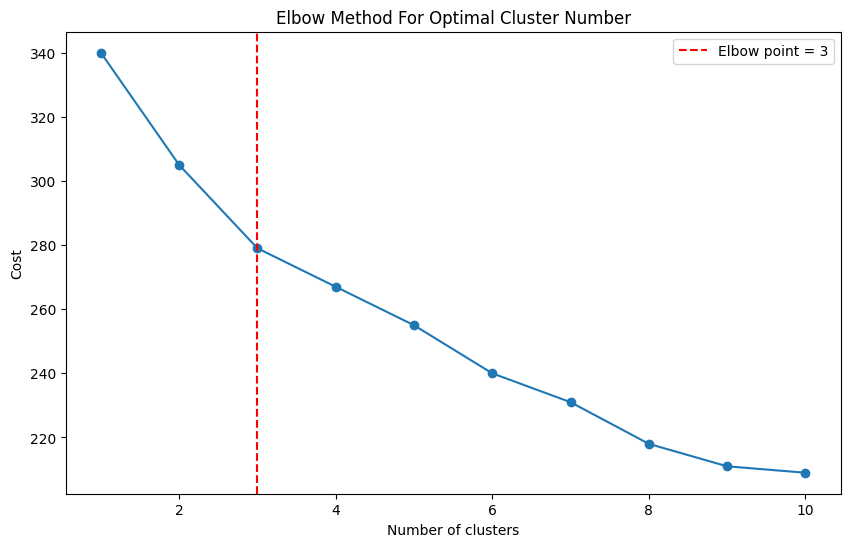

In [8]:
from kmodes.kmodes import KModes
import pandas as pd
import numpy as np

np.random.seed(2023)
data = pd.DataFrame(np.random.randint(0, 10, size=(100, 4))).apply(lambda x: x.astype('object'))

kmodes = KModes(init='Huang', n_init=5)
searcher = NClusterSearch(estimator=kmodes, method='elbow')
searcher.fit(data)
searcher.plot()

In [10]:
!pip install scikit-learn-extra


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.9 MB/s eta 0:00:00


  0%|          | 0/9 [00:00<?, ?it/s]

Calculating silhouette scores...
Creating distance matrix...


100%|██████████| 9/9 [00:06<00:00,  1.46it/s]


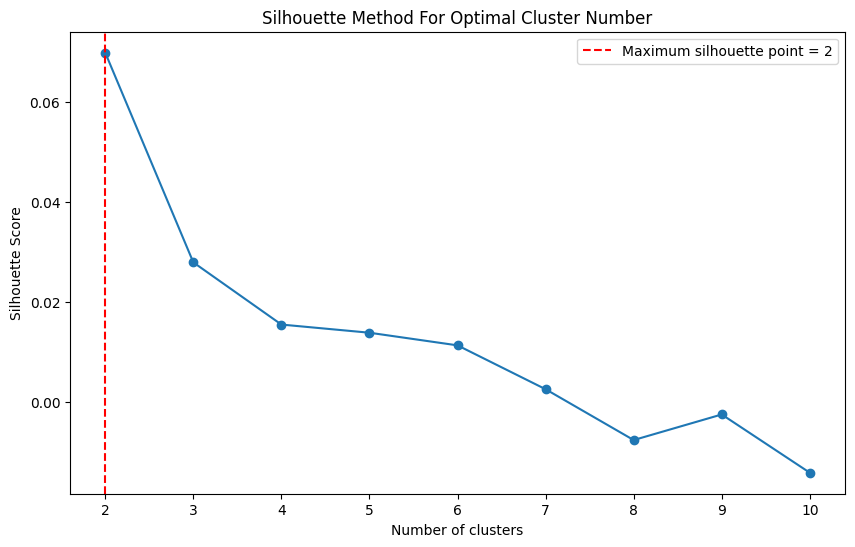

In [12]:
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes

np.random.seed(2023)
data = pd.DataFrame(np.random.randint(0, 10, size=(100, 4))).apply(lambda x: x.astype('object'))
data["new"] = np.random.randint(0, 10, size=(100, 1))

searcher = NClusterSearch(estimator=KPrototypes(), method='silhouette', verbose=True)
searcher.fit(data, categorical=[0, 1, 2, 3])
searcher.plot()

In [ ]:
# https://estyp.readthedocs.io/en/latest/cluster.html#optimal-number-of-clusters-searcher